In [1]:
# standart libs
import sys
import random
import copy
from operator import itemgetter
from PIL import Image


# 3rd party libs
import pandas as pd
import numpy as np
import gempy as gp
import matplotlib.pyplot as plt
import scipy.stats as ss
from skimage import measure
from matplotlib import gridspec


# local
import functions.realization_setup as real_setup
import functions.realization_run as real_run
import functions.post_processing as post_pro
import functions.uq_runs as uq_runs


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### SBIM

#### methodes_modeling_SBIM_1

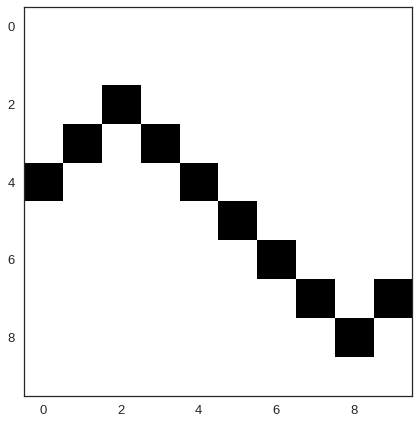

In [2]:
x = [0,1,2,3,4,5,6,7,8,9]
y = [7,8,7,6,5,4,3,2,3,4][::-1]
A = np.zeros((10,10))
for i, x_i in enumerate(x):
    y_i = y[i]
    A[y_i, x_i] = 1
    
plt.imshow(A)

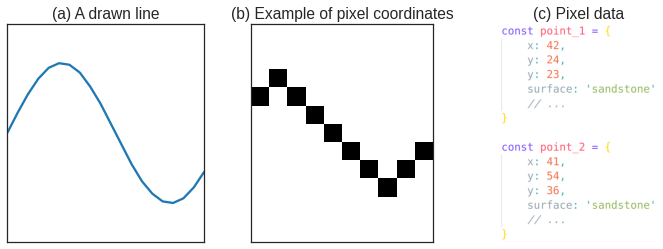

In [3]:
# line_to_data
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, constrained_layout=False, figsize=(12, 4))
# fig.suptitle('Sketch to numerical representation', fontsize=16)

# data
# new
x = np.round(np.arange(0, 1, 0.05), 2)
y = np.round(np.sin(x * 6) * 0.45 + 0.5, 2)


# ax0 the drawn line
ax0.plot(x, y, '-')
ax0.set_xlim([0,0.95])
ax0.set_ylim([-0.2,1.2])
ax0.set_yticklabels([])
ax0.set_xticklabels([])
# ax0.set_ylabel('y')
# ax0.set_xlabel('x')
ax0.set_title('(a) A drawn line')

# new
xx = [0,1,2,3,4,5,6,7,8,9]
yy = [7,8,7,6,5,4,3,2,3,4][::]
A = np.zeros((10,10))
for i, x_i in enumerate(xx):
    y_i = yy[i]
    A[y_i, x_i] = 1

# ax1 the drawn line
ax1.imshow(A)
#ax1.set_xlim([0,10])
ax1.set_ylim([-1,11])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
# ax1.set_ylabel('y')
# ax1.set_xlabel('x')
ax1.set_title('(b) Example of pixel coordinates')

# ax2 the drawn line
# data = np.stack((x,y)).T[:17,:]
# ax2.table(cellText=data, colLabels=('X', 'Y'), loc='center')

im = Image.open('images/point_obj.png')
ax2.imshow(im)
ax2.axis('off')
ax2.set_title('(c) Pixel data')

# save
fig.savefig('../document/figures/methodes_modeling_SBIM_1.png')
plt.show()

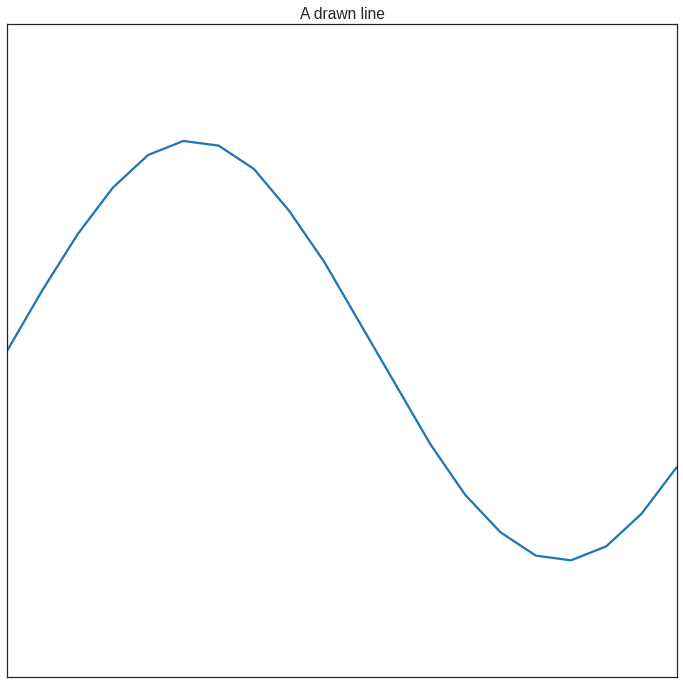

In [4]:

fig, (ax0) = plt.subplots(nrows=1, ncols=1, constrained_layout=False, figsize=(12, 12))

# ax0 the drawn line
ax0.plot(x, y, '-')
ax0.set_xlim([0,0.95])
ax0.set_ylim([-0.2,1.2])
ax0.set_yticklabels([])
ax0.set_xticklabels([])
# ax0.set_ylabel('y')
# ax0.set_xlabel('x')
ax0.set_title('A drawn line')
fig.savefig('../document/figures/methodes_modeling_SBIM_a.png')

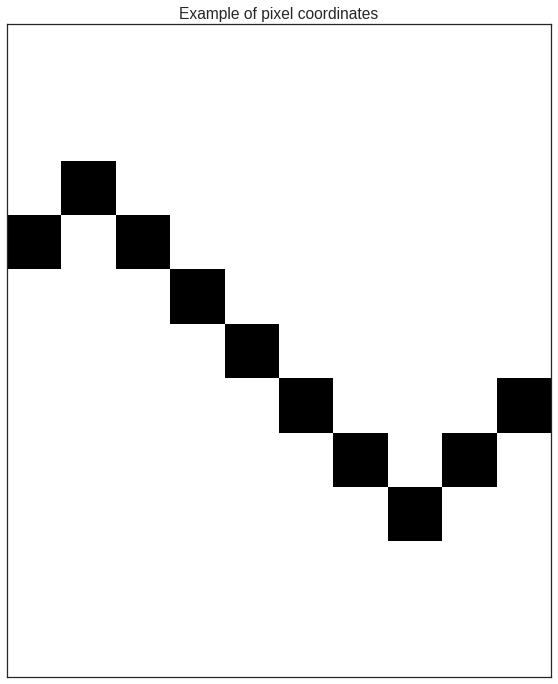

In [5]:

fig, (ax0) = plt.subplots(nrows=1, ncols=1, constrained_layout=False, figsize=(12, 12))

# new
xx = [0,1,2,3,4,5,6,7,8,9]
yy = [7,8,7,6,5,4,3,2,3,4][::]
A = np.zeros((10,10))
for i, x_i in enumerate(xx):
    y_i = yy[i]
    A[y_i, x_i] = 1

# ax1 the drawn line
ax0.imshow(A)
#ax1.set_xlim([0,10])
ax0.set_ylim([-1,11])
ax0.set_yticklabels([])
ax0.set_xticklabels([])
# ax1.set_ylabel('y')
# ax1.set_xlabel('x')
ax0.set_title('Example of pixel coordinates')
fig.savefig('../document/figures/methodes_modeling_SBIM_c.png')

In [6]:
# new
xx = [0,1,2,3,4,5,6,7,8,9]
yy = [7,8,7,6,5,4,3,2,3,4][::]
A = np.zeros((10,10))
for i, x_i in enumerate(xx):
    y_i = yy[i]
    A[y_i, x_i] = 1

im = Image.open('images/point_obj.png')
ax0.imshow(im)
ax0.axis('off')
ax0.set_title('Pixel data')
fig.savefig('../document/figures/methodes_modeling_SBIM_c.png')

#### methodes_modeling_SBIM_2

/home/namur/coding/notebooks/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


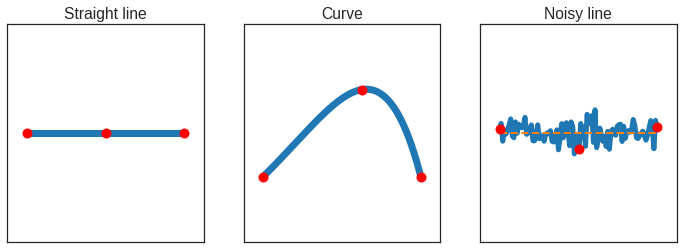

In [7]:
# line_to_data
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, constrained_layout=False, figsize=(12, 4))
# fig.suptitle('Information carried by points', fontsize=16)


# data
x0 = np.array([0.1, 0.5, 0.9])
y0 = np.array([0.5, 0.5, 0.5])

# ax0 the drawn line
ax0.plot(x0, y0, '-', linewidth=7.0, label='sample points', )
ax0.plot(x0, y0, 'o', c='red', markersize=10, label='trace')
ax0.set_xlim([0,1])
ax0.set_ylim([0,1])
ax0.set_yticklabels([])
ax0.set_xticklabels([])
# ax0.set_ylabel('y')
# ax0.set_xlabel('x')
ax0.set_title('Straight line')
# ax0.legend(loc='upper right')

# new
x1 = np.array([0.1, 0.6, 0.9])
y1 = np.array([0.3, 0.7, 0.3])
poly = np.polyfit(x1, y1 ,5)
x1n = np.linspace(0.1, 0.9, 1000)
poly_y = np.poly1d(poly)(x1n)

# ax1 the drawn line
ax1.plot(x1n, poly_y, linewidth=7.0)
ax1.plot(x1, y1, 'o', c='red', markersize=10)
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
# ax1.set_ylabel('y')
# ax1.set_xlabel('x')
ax1.set_title('Curve')

# ax2 noisy line
x2 = np.linspace(0.1, 0.9, 100)
y2 = np.ones(x2.shape) * 0.5
noise = np.random.normal(0,0.04,x2.shape)
y2n = y2 + noise
ax2.plot(x2, y2n, linewidth=5.0)
ax2.plot(x0, y0, '--', linewidth=2.0,)
ax2.plot(x2[[0,50,99]], y2n[[0,50,99]], 'o', c='red', markersize=10, label='trace')
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
# ax2.set_ylabel('y')
# ax2.set_xlabel('x')
ax2.set_title('Noisy line')

# save
fig.savefig('../document/figures/methodes_modeling_SBIM_2.png')
plt.show()

#### methodes_modeling_GemPy_1

In [8]:
# instantiate the geo_model
geo_model = gp.create_model("GeoModel")

# defautl data
geo_model = gp.init_data(
    geo_model,
    extent=[0, 1, 0, 1, 0, 1],
    resolution=[1, 1, 1]
)

# compile theno function
gp.set_interpolation_data(
    geo_model,
    compile_theano=True,
    theano_optimizer='fast_run',
)

Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range              1.73205
$C_o$            0.0714286
drift equations        [3]


In [9]:
# meta
geo_model_extent_1 = [0,1000,0,1000,0,1000]
section_1 = {
    'p1': [0, 500],
    'p2': [1000, 500],
    'resolution': [200, 200]
}

# sereis
series_df_1 = pd.DataFrame(columns=['name', 'isfault', 'order_series'])
series_df_1.loc[0] = { 'order_series': 0, 'name': 'Basement_Series', 'isfault': False }
series_df_1.loc[1] = { 'order_series': 1, 'name': 'Strat_Series', 'isfault': False }

# surfaces
surfaces_df_1 = pd.DataFrame(columns=['name', 'serie', 'order_surface'])
surfaces_df_1.loc[0] = { 'name': 'basement', 'serie': 'Basement_Series', 'order_surface': 0 }
surfaces_df_1.loc[2] = { 'name': 'rock1', 'serie': 'Strat_Series', 'order_surface': 1 }
surfaces_df_1.loc[1] = { 'name': 'rock2', 'serie': 'Strat_Series', 'order_surface': 2 }

# geoData
surface_points_input_data_1 = pd.read_csv('./data/model2_surface_points.csv')
orientaions_input_data_1 = pd.read_csv('./data/model2_orientations.csv')

# Format geological_input_data
surface_points_original_df_1 = surface_points_input_data_1[['X', 'Y', 'Z', 'formation']]

# rename colums
surface_points_original_df_1.columns = ['X', 'Y', 'Z', 'surface']

# add distribution type and parameter
surface_points_original_df_1['param1'] = 10

# Orientaions
orientations_original_df_1 = orientaions_input_data_1[['X', 'Y', 'Z', 'dip', 'azimuth', 'polarity', 'formation']]

# %%timeit
# setup model 1
real_setup.setup_realization(
        geo_model=geo_model,
        geo_model_extent=geo_model_extent_1,
        section=section_1,
        series_df=series_df_1,
        surfaces_df=surfaces_df_1,
        surface_points_original_df=surface_points_original_df_1,
        orientations_original_df=orientations_original_df_1
)


if real_run.check_setup_single_realization(geo_model):
    solution = gp.compute_model(model=geo_model, sort_surfaces=False)

# get scalar field
arr_len_0, arr_len_n = geo_model.grid.sections.get_section_args('section')
section_scalar_field_values = geo_model.solutions.sections[1][:,arr_len_0:arr_len_n]
scalar_field = section_scalar_field_values.reshape(200,200).T

Active grids: ['regular']
Active grids: ['regular' 'sections']
HOTFIX in update_series()
HOTFIX in update_surfaces()
Run realizations setup checks until stable workflow.


No handles with labels found to put in legend.


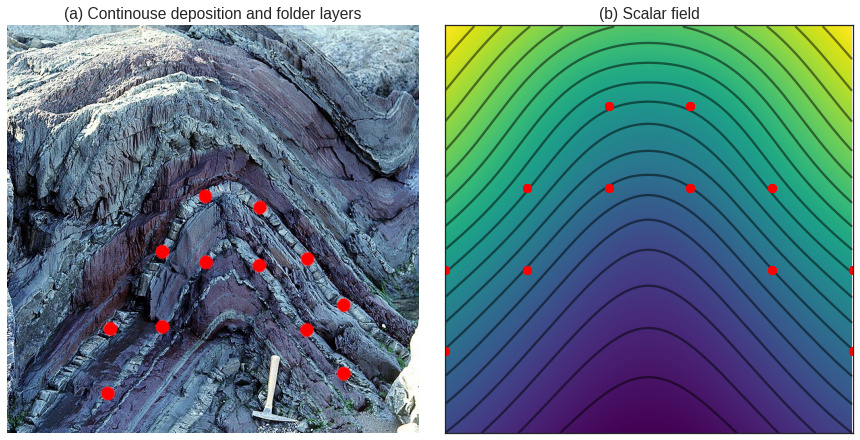

In [19]:
fig, (ax0, ax1 ) = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(12, 6))

contours = post_pro.compute_section_contours(geo_model)
xvals = surface_points_original_df_1.X / 5
zvals = surface_points_original_df_1.Z / 5

xrock1, yrock1 = contours['rock1'][:,0], contours['rock1'][:,1]
xrock2, yrock2 = contours['rock2'][:,0], contours['rock2'][:,1]

# ax0.plot(xrock1, yrock1, label='Rock1', c='steelblue')
# ax0.plot(xrock2, yrock2, label='Rock1', c='steelblue')
# ax0.fill_between(xrock2, 0, np.ones(xrock2.shape) * 1000, alpha=0.5, color='black')
# ax0.fill_between(xrock2, 0, yrock2, alpha=1, color='green', label='Rock2')
# ax0.fill_between(xrock1, 0, yrock1, alpha=1, color='blue', label='Rock1')
# plot from matrix shifting here  # 
# ax0.fill_between(xrock1, yrock1, yrock2, alpha=1, color='green')

# http://myweb.facstaff.wwu.edu/talbot/cdgeol/Structure/Fold/Folds1/Fold_styles.html
im = Image.open('images/anticline3.jpg')
ax0.imshow(im)
ax0.axis('off')

# ax0.plot(xvals, zvals, 'o', c='red', label='Measurements')
ax0.axis('image')
ax0.set_xticks([])
ax0.set_yticks([])
# ax.set_xlim([np.min(xvals),np.max(xvals)])
# ax.set_ylim([np.min(zvals),np.max(zvals)])
# ax0.set_xlim(0,200)
# ax0.set_ylim(0,200)
ax0.legend()

# get min and max value
smin, smax = np.min(scalar_field), np.max(scalar_field)
# create a set of values to calcualte contours
svals = np.linspace(smin, smax, 20)
contours = {}
# extract contours
for i in svals:    
    contour = measure.find_contours(scalar_field.T, i)
    if len(contour) > 0:   
        for ii in range(len(contour)):
            x = contour[ii][:,0]
            y = contour[ii][:,1]
            ax1.plot(x, y, '-', c='black', alpha=0.5)
            
ax0.set_title('(a) Continouse deposition and folder layers')
# ax0.set_ylabel('y')
# ax0.set_xlabel('x')     

# ax0 the drawn line
ax1.imshow(scalar_field, cmap='viridis')
ax1.set_xlim([0,200])
ax1.set_ylim([0,200])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
# ax1.set_ylabel('y')
# ax1.set_xlabel('x')
ax1.set_title('(b) Scalar field')
ax1.plot(xvals, zvals, 'o', c='red')

# save
fig.savefig('../document/figures/methodes_outcrop_to_scalarfield.png')
plt.show()

In [20]:
xvals

0       0.0
1       0.0
2       0.0
3      80.0
4      80.0
5      80.0
6      40.0
7      40.0
8      40.0
9     160.0
10    160.0
11    160.0
12    120.0
13    120.0
14    120.0
15    200.0
16    200.0
17    200.0
18      0.0
19      0.0
20      0.0
21    200.0
22    200.0
23    200.0
24     80.0
25     80.0
26     80.0
27     40.0
28     40.0
29     40.0
30    120.0
31    120.0
32    120.0
33    160.0
34    160.0
35    160.0
Name: X, dtype: float64

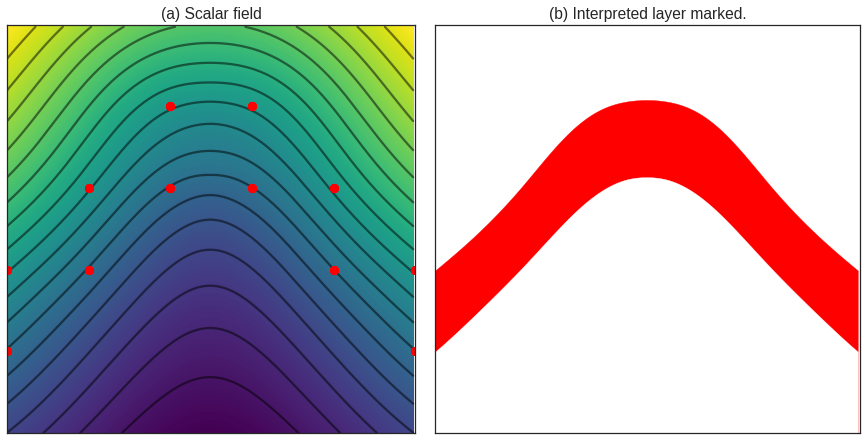

In [11]:
fig, (ax0, ax1 ) = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(12, 6))

contours = post_pro.compute_section_contours(geo_model)
xvals = surface_points_original_df_1.X / 5
zvals = surface_points_original_df_1.Z / 5
xrock1, yrock1 = contours['rock1'][:,0], contours['rock1'][:,1]
xrock2, yrock2 = contours['rock2'][:,0], contours['rock2'][:,1]

# get min and max value
smin, smax = np.min(scalar_field), np.max(scalar_field)
# create a set of values to calcualte contours
svals = np.linspace(smin, smax, 20)
# extract contours
for i in svals:    
    contour = measure.find_contours(scalar_field.T, i)
    if len(contour) > 0:   
        for ii in range(len(contour)):
            x = contour[ii][:,0]
            y = contour[ii][:,1]
            ax0.plot(x, y, '-', c='black', alpha=0.5)
            
ax0.set_title('Two continouse deposition and folder layer')
ax0.imshow(scalar_field, cmap='viridis')
ax0.set_xlim([0,200])
ax0.set_ylim([0,200])
ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax0.set_title('(a) Scalar field')
ax0.plot(xvals, zvals, 'o', c='red')

# ax1.plot(xrock1, yrock1, label='Rock1', c='steelblue')
# ax1.plot(xrock2, yrock2, label='Rock1', c='steelblue')
# ax1.fill_between(xrock2, 0, np.ones(xrock2.shape) * 1000, alpha=0.5, color='black')
ax1.fill_between(xrock2, 0, yrock2, alpha=1, color='red', label='Rock2')
ax1.fill_between(xrock1, 0, yrock1, alpha=1, color='white', label='Rock1')
ax1.set_xlim([0,200])
ax1.set_ylim([0,200])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_title('(b) Interpreted layer marked.')

# save
fig.savefig('../document/figures/methodes_scalar_field_to_model.png')
plt.show()

#### SBIM for GemPy

In [12]:
# code plus 3D sample

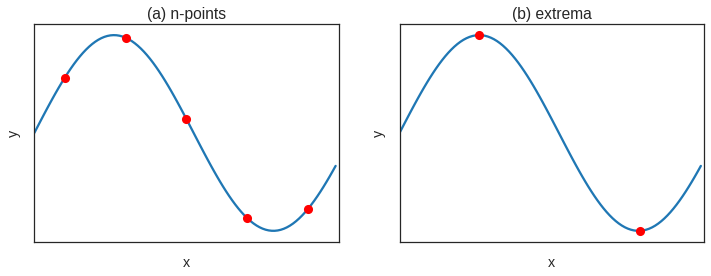

In [13]:
# 3 methodes
# line_to_data
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(12, 4))
# fig.suptitle('Sketch to numerical representation', fontsize=16)

# data
x = np.round(np.arange(0, 1, 0.01), 5)
y = np.round(np.sin(x * 6) * 0.45 + 0.5, 5)

# ax0 the drawn line
ax0.plot(x, y, '-')
ax0.plot(x[10::20], y[10::20], 'o', c='red')
ax0.set_xlim([0,1])
ax0.set_ylim([0,1])
ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax0.set_ylabel('y')
ax0.set_xlabel('x')
ax0.set_title('(a) n-points')

# ax1 the drawn line
ymax, ymin = np.max(y), np.min(y)
ymax_pos, ymin_pos = np.where(y == ymax), np.where(y == ymin)
ax1.plot(x, y, '-')
ax1.plot(x[ymax_pos], y[ymax_pos], 'o', c='red')
ax1.plot(x[ymin_pos], y[ymin_pos], 'o', c='red')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.set_title('(b) extrema')

# save
fig.savefig('../document/figures/methodes_modeling_SBIM_for_GemPy_2.png')
plt.show()

In [14]:
surface_points_original_df_1.param1 = 20
xvals = surface_points_original_df_1.X / 5
zvals = surface_points_original_df_1.Z / 5

In [15]:
mapping_object = real_setup.creat_mapping_object(
    series_df=series_df_1,
    surfaces_df=surfaces_df_1
)

entropy_map = uq_runs.calulate_entropy_map(
    geo_model=geo_model,
    n_realization=10,
    surface_points_original_df=surface_points_original_df_1,
    orientations_original_df=orientations_original_df_1,
    section=section_1,
    mapping_object=mapping_object
)

Realization: 0
ValueError
Realization: 1
ValueError
Realization: 2
ValueError
Realization: 3
ValueError
Realization: 4
ValueError
Realization: 5
ValueError
Realization: 6
ValueError
Realization: 7
ValueError
Realization: 8
ValueError
Realization: 9
ValueError


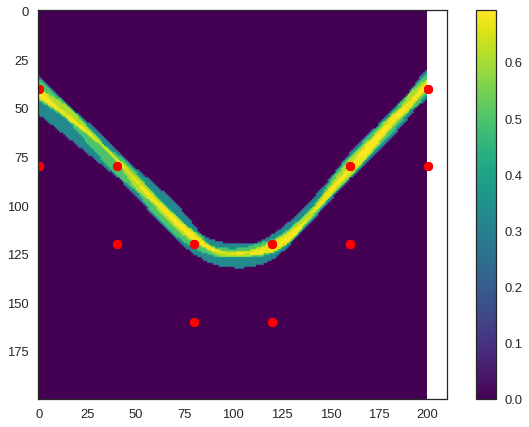

In [16]:
plt.imshow(entropy_map.T[:,:], cmap='viridis')
plt.plot(xvals, zvals, 'o', c='red')
plt.colorbar()
plt.show()

(0.0, 4.2)

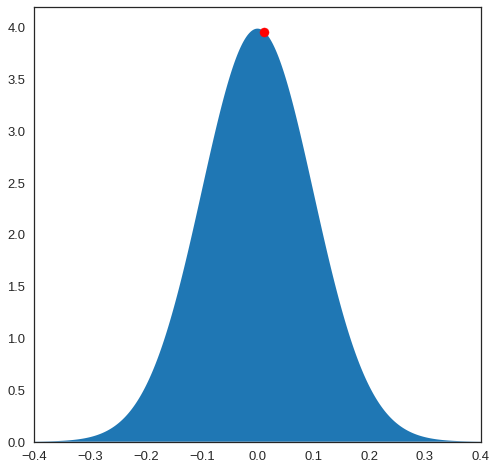

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=False, figsize=(8, 8))
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
# count, bins, ignored = plt.hist(s, 100, density=True)
# ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
xvals = np.linspace(-0.4, 0.4, 1000)
yvals = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp( - (xvals - mu)**2 / (2 * sigma**2))
ax.fill_between(xvals, 0, yvals)
x = 0.0124
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
ax.scatter(x,y,c='red')
ax.set_xlim([-0.4,0.4])
ax.set_ylim([0,4.2])